## University System of Maryland Salary Comparison



In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns

data = pd.read_csv('cy2019-md.csv', low_memory=False)

df = pd.DataFrame(data)

df.loc[(df['subtitle'].str.contains('360231-UMBC|360295-UMBC', na=False)), 'location'] = "Baltimore County"
df.loc[(df['subtitle'].str.contains('UMCP', na=False)), 'location'] = "Prince Georges County"
df.loc[(df['subtitle'].str.contains('360221-UMB|360291-UMB', na=False)), 'location'] = "Baltimore City"
df.loc[(df['subtitle'].str.contains('UMES', na=False)), 'location'] = "Somerset County"
df.loc[(df['subtitle'].str.contains('UMGC', na=False)), 'location'] = "Prince Georges County"

df.loc[(df['subtitle'].str.contains('360231-UMBC|360295-UMBC', na=False)), 'School'] = "UMBC"
df.loc[(df['subtitle'].str.contains('UMCP', na=False)), 'School'] = "UMCP"
df.loc[(df['subtitle'].str.contains('360221-UMB|360291-UMB', na=False)), 'School'] = "UMB"
df.loc[(df['subtitle'].str.contains('UMES', na=False)), 'School'] = "UMES"
df.loc[(df['subtitle'].str.contains('UMGC', na=False)), 'School'] = "UMGC"

cut_points = [-1,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 10000000]
label_names = ["0-10000","10001-20000","20001-30000","30001-40000","40001-50000",
              "50001-60000","60001-70000","70001-80000","80001-90000","90001-100000", "100000+"]
df["income_categories"] = pd.cut(df["ytd_gross_earnings"],cut_points,labels=label_names)

UMBC = df[df['subtitle'].str.contains('360231-UMBC|360295-UMBC', na=False)]
UMCP = df[df['subtitle'].str.contains('UMCP', na=False)]
UMB = df[df['subtitle'].str.contains('360221-UMB|360291-UMB', na=False)]
UMGC = df[df['subtitle'].str.contains('UMGC', na=False)]
UMES = df[df['subtitle'].str.contains('UMES', na=False)]

universities = UMBC.append(UMCP).append(UMB).append(UMGC).append(UMES)
display(universities)

print("UMBC records number: " + str(len(UMBC)))
print("UMCP records number: " + str(len(UMCP)))
print("UMB records number: " + str(len(UMB)))
print("UMGC records number: " + str(len(UMGC)))
print("UMES records number: " + str(len(UMES)))

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,term_date,location,School,income_categories
123086,OLEG,NaN,FIRSIN,NaN,UM,360231,UNIVERSITY OF MARYLAND,360231-UMBC,1012,100000.0,A,104000,0,500,105000,NaN,Baltimore County,UMBC,100000+
123087,B,M,RABIN,NaN,UM,360231,UNIVERSITY OF MARYLAND,360231-UMBC,1212,141000.0,A,138000,0,500,138000,NaN,Baltimore County,UMBC,100000+
123088,MD TOUHIDUL,NaN,ISLAM,NaN,UM,360231,UNIVERSITY OF MARYLAND,360231-UMBC,1212,32000.0,A,0,0,10500,10000,NaN,Baltimore County,UMBC,0-10000
123089,RUCHITA,NaN,PARAB,NaN,UM,360231,UNIVERSITY OF MARYLAND,360231-UMBC,1111,0.0,H,0,0,5600,6000,2019-05-26T00:00:00Z,Baltimore County,UMBC,0-10000
123090,SURBHI,G,LIPKIN-MOORE,NaN,UM,360231,UNIVERSITY OF MARYLAND,360231-UMBC,1212,18000.0,A,1000,0,9000,10000,NaN,Baltimore County,UMBC,0-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116289,IYAD ELDIN,M,ELFADIL,NaN,UM,360225,UNIVERSITY OF MARYLAND,360225-UMES,1111,0.0,H,1000,0,0,1000,NaN,Somerset County,UMES,0-10000
116290,AHMED,O,IBRAHIM,NaN,UM,360225,UNIVERSITY OF MARYLAND,360225-UMES,1111,0.0,H,0,0,0,0,2019-05-15T00:00:00Z,Somerset County,UMES,0-10000
116291,ZOE,C,JOHNSON,NaN,UM,360225,UNIVERSITY OF MARYLAND,360225-UMES,1212,15000.0,A,0,0,16800,17000,NaN,Somerset County,UMES,10001-20000
116292,SAWSAN,A,MOHAMED,NaN,UM,360225,UNIVERSITY OF MARYLAND,360225-UMES,1010,6000.0,A,6000,0,0,6000,NaN,Somerset County,UMES,0-10000


UMBC records number: 8893
UMCP records number: 37295
UMB records number: 10092
UMGC records number: 6792
UMES records number: 1962


In [2]:
interval = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,
           110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]

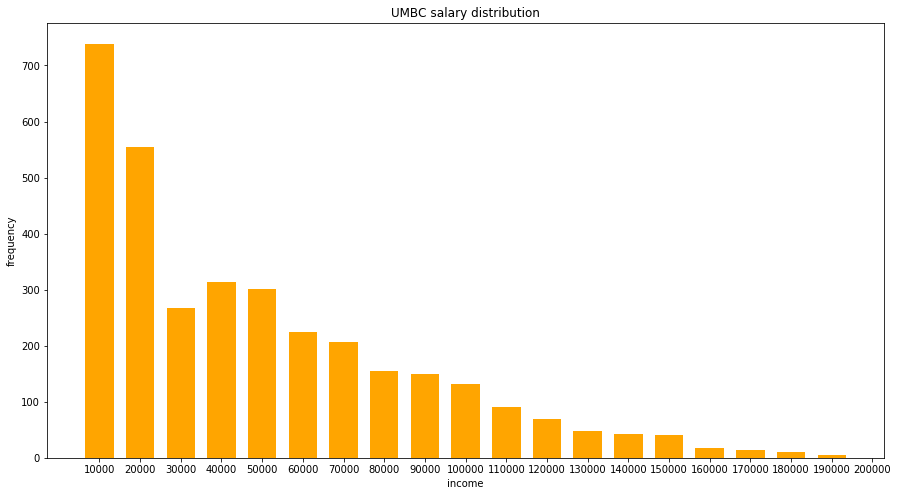

<bound method Series.mean of 123086    105000
123087    138000
123088     10000
123089      6000
123090     10000
           ...  
134396      2000
134397     11000
134398     10000
134399     13000
134400     14000
Name: ytd_gross_earnings, Length: 8893, dtype: int64>


In [59]:
plt.figure(figsize=(15,8))
plt.title('UMBC salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMBC['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7, color='orange')
plt.xticks(interval)
plt.show()


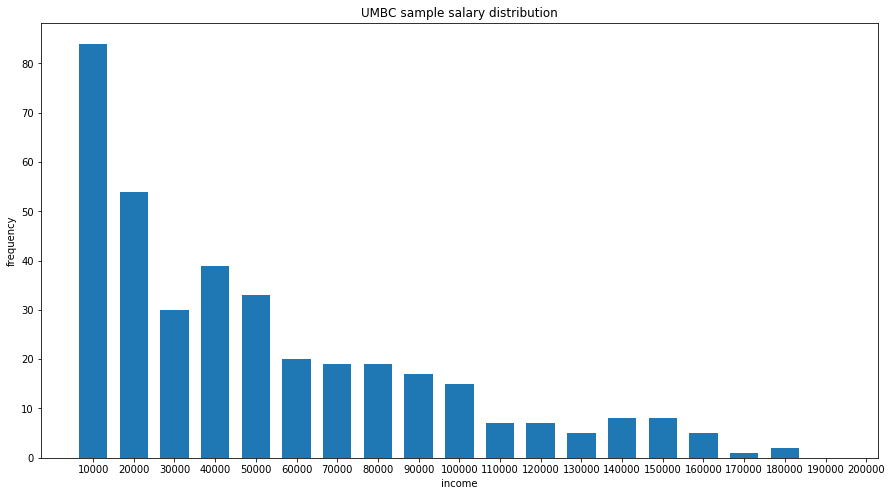

<bound method Series.median of 127895        0
127502     1000
131283        0
128998        0
131805     4000
          ...  
126174        0
126120    79000
130010    14000
125031        0
127934        0
Name: ytd_gross_earnings, Length: 1000, dtype: int64>


In [60]:
UMBC_sample_salary = UMBC.sample(n = 1000, replace = False) 

plt.figure(figsize=(15,8))
plt.title('UMBC sample salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMBC_sample_salary['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7)
plt.xticks(interval)
plt.show()


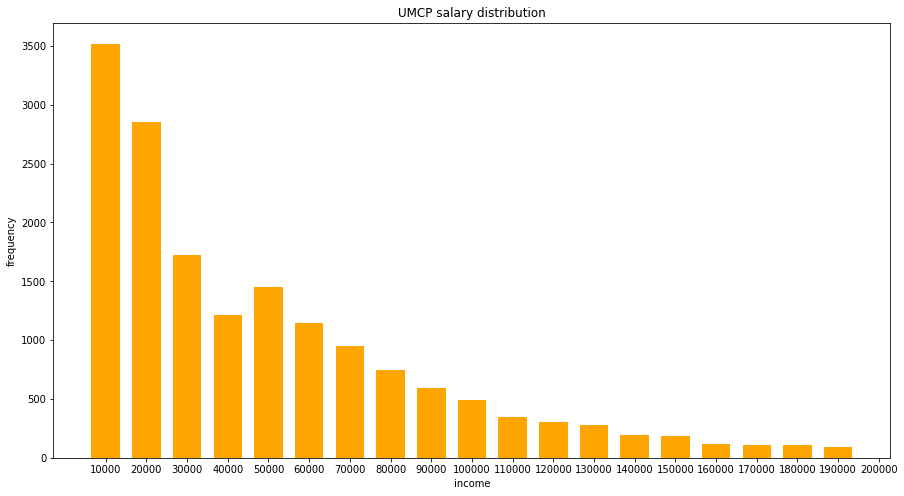

In [5]:
plt.figure(figsize=(15,8))
plt.title('UMCP salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMCP['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7, color='orange')
plt.xticks(interval)
plt.show()

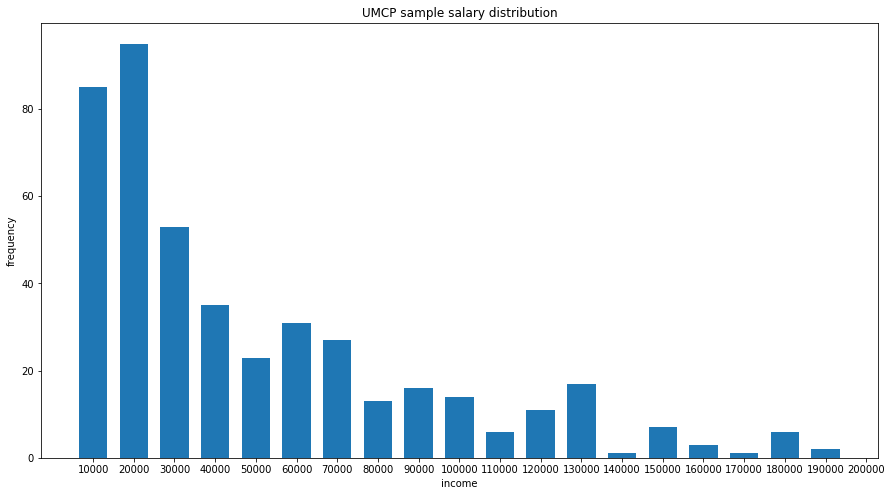

In [6]:
UMCP_sample_salary = UMCP.sample(n = 1000, replace = False) 

plt.figure(figsize=(15,8))
plt.title('UMCP sample salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMCP_sample_salary['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7)
plt.xticks(interval)
plt.show()

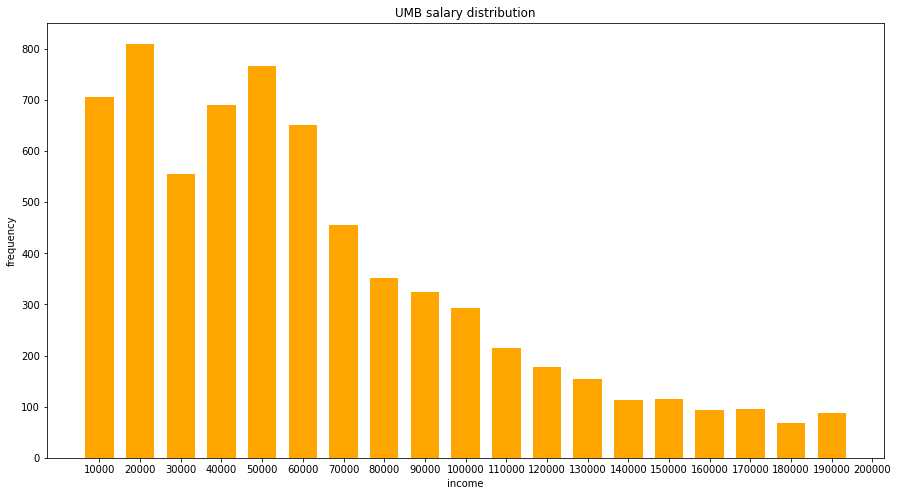

In [7]:
plt.figure(figsize=(15,8))
plt.title('UMB salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMB['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7, color='orange')
plt.xticks(interval)
plt.show()

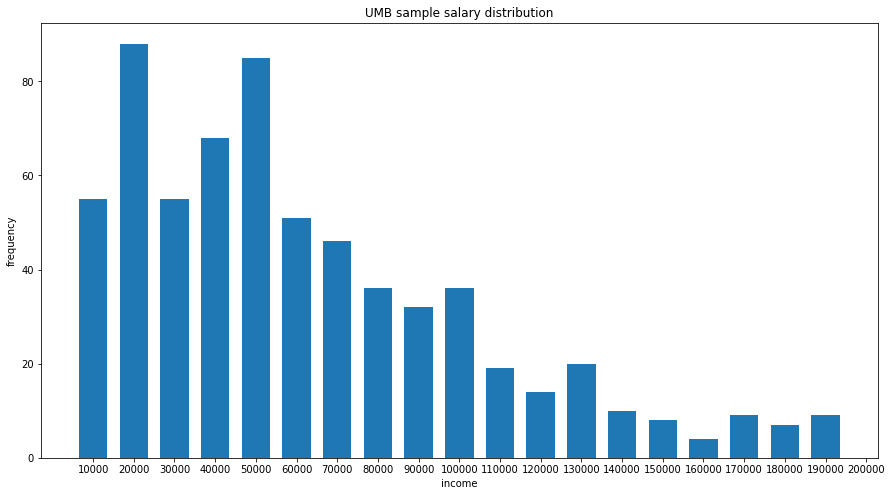

In [8]:
UMB_sample_salary = UMB.sample(n = 1000, replace = False) 

plt.figure(figsize=(15,8))
plt.title('UMB sample salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMB_sample_salary['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7)
plt.xticks(interval)
plt.show()

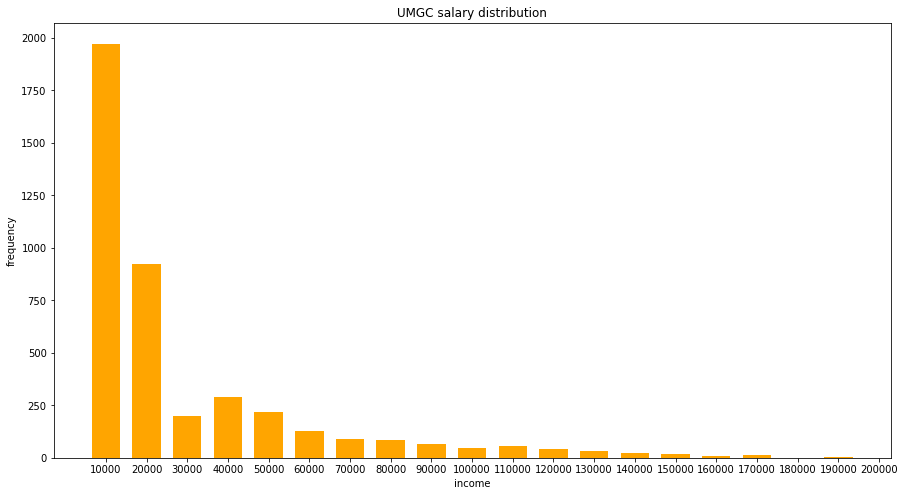

<bound method Series.mean of 116294    134000
116295     15000
116296     18000
116297     10000
116298     34000
           ...  
123081      4000
123082     17000
123083      3000
123084      5000
123085     63000
Name: ytd_gross_earnings, Length: 6792, dtype: int64>


In [9]:
plt.figure(figsize=(15,8))
plt.title('UMGC salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMGC['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7, color='orange')
plt.xticks(interval)
plt.show()

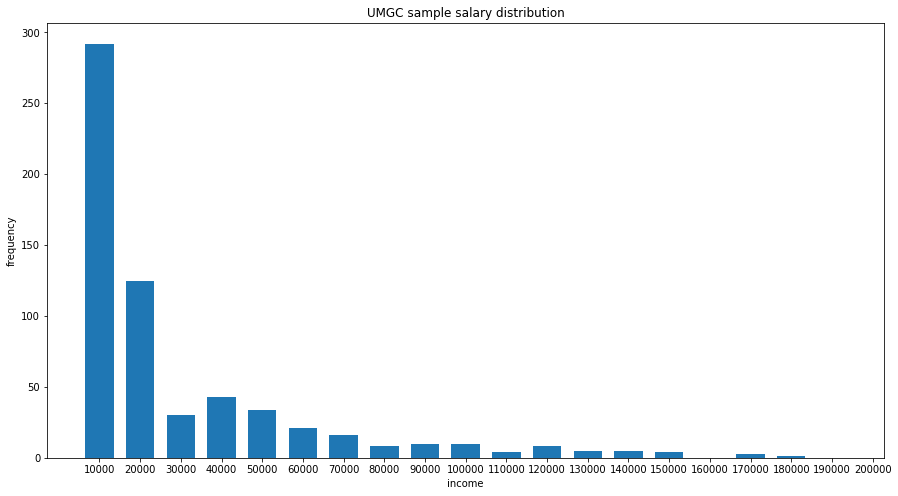

In [10]:
UMGC_sample_salary = UMGC.sample(n = 1000, replace = False) 

plt.figure(figsize=(15,8))
plt.title('UMGC sample salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMGC_sample_salary['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7)
plt.xticks(interval)
plt.show()

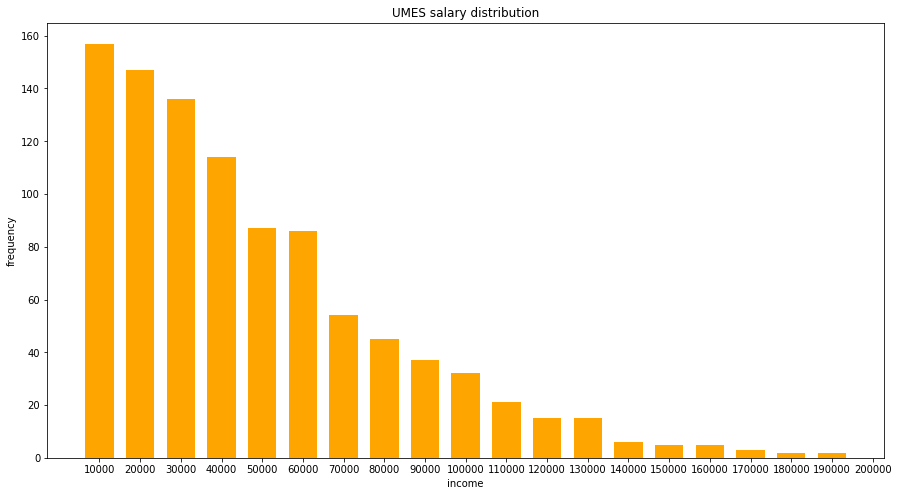

In [11]:
plt.figure(figsize=(15,8))
plt.title('UMES salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMES['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7, color='orange')
plt.xticks(interval)
plt.show()

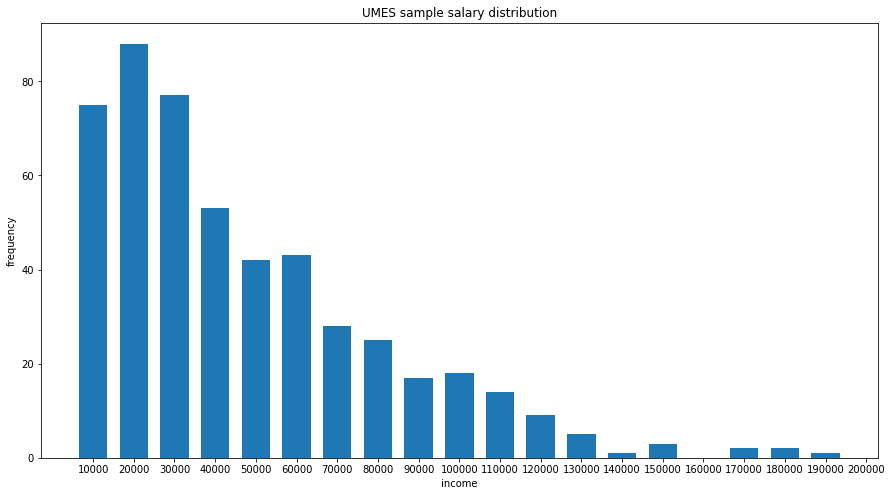

In [12]:
UMES_sample_salary = UMES.sample(n = 1000, replace = False) 

plt.figure(figsize=(15,8))
plt.title('UMES sample salary distribution')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist(UMES_sample_salary['ytd_gross_earnings'], bins=interval, align='left', rwidth=0.7)
plt.xticks(interval)
plt.show()

In [13]:
print('UMBC salary mean: ' + str(UMBC['ytd_gross_earnings'].mean()))
print('UMCP salary mean: ' + str(UMCP['ytd_gross_earnings'].mean()))
print('UMB salary mean: ' + str(UMB['ytd_gross_earnings'].mean()))
print('UMGC salary mean: ' + str(UMGC['ytd_gross_earnings'].mean()))
print('UMES salary mean: ' + str(UMES['ytd_gross_earnings'].mean()))

UMBC salary mean: 22720.566737883728
UMCP salary mean: 28138.35634803593
UMB salary mean: 65774.77209671027
UMGC salary mean: 23162.54416961131
UMES salary mean: 27361.875637104997


In [14]:
UMB_UMBC_ALL=(UMB['ytd_gross_earnings'].mean()-UMBC['ytd_gross_earnings'].mean())/((UMB['ytd_gross_earnings'].mean() + UMBC['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMCP_ALL=(UMB['ytd_gross_earnings'].mean()-UMCP['ytd_gross_earnings'].mean())/((UMB['ytd_gross_earnings'].mean() + UMCP['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMES_ALL=(UMB['ytd_gross_earnings'].mean()-UMES['ytd_gross_earnings'].mean())/((UMB['ytd_gross_earnings'].mean() + UMES['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMGC_ALL=(UMB['ytd_gross_earnings'].mean()-UMGC['ytd_gross_earnings'].mean())/((UMB['ytd_gross_earnings'].mean() + UMGC['ytd_gross_earnings'].mean()) / 2)*100

print('The percentage difference between UMB and UMBC is ',UMB_UMBC_ALL)
print('The percentage difference between UMB and UMCP is ',UMB_UMCP_ALL)
print('The percentage difference between UMB and UMES is ',UMB_UMES_ALL)
print('The percentage difference between UMB and UMGC is ',UMB_UMGC_ALL)

The percentage difference between UMB and UMBC is  97.30276402308341
The percentage difference between UMB and UMCP is  80.15155361546225
The percentage difference between UMB and UMES is  82.48717855808898
The percentage difference between UMB and UMGC is  95.82530644279218


In [15]:
print('UMBC sample salary mean: ' + str(UMBC_sample_salary['ytd_gross_earnings'].mean()))
print('UMCP sample salary mean: ' + str(UMCP_sample_salary['ytd_gross_earnings'].mean()))
print('UMB sample salary mean: ' + str(UMB_sample_salary['ytd_gross_earnings'].mean()))
print('UMGC sample salary mean: ' + str(UMGC_sample_salary['ytd_gross_earnings'].mean()))
print('UMES sample salary mean: ' + str(UMES_sample_salary['ytd_gross_earnings'].mean()))


UMBC sample salary mean: 23216.0
UMCP sample salary mean: 30039.0
UMB sample salary mean: 67261.0
UMGC sample salary mean: 24372.0
UMES sample salary mean: 27403.0


In [16]:
UMB_UMBC_S=(UMB_sample_salary['ytd_gross_earnings'].mean()-UMBC_sample_salary['ytd_gross_earnings'].mean())/((UMB_sample_salary['ytd_gross_earnings'].mean() + UMBC_sample_salary['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMCP_S=(UMB_sample_salary['ytd_gross_earnings'].mean()-UMCP_sample_salary['ytd_gross_earnings'].mean())/((UMB_sample_salary['ytd_gross_earnings'].mean() + UMCP_sample_salary['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMES_S=(UMB_sample_salary['ytd_gross_earnings'].mean()-UMES_sample_salary['ytd_gross_earnings'].mean())/((UMB_sample_salary['ytd_gross_earnings'].mean() + UMES_sample_salary['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMGC_S=(UMB_sample_salary['ytd_gross_earnings'].mean()-UMGC_sample_salary['ytd_gross_earnings'].mean())/((UMB_sample_salary['ytd_gross_earnings'].mean() + UMGC_sample_salary['ytd_gross_earnings'].mean()) / 2)*100

print('The percentage difference between UMB and UMBC is ',UMB_UMBC_S)
print('The percentage difference between UMB and UMCP is ',UMB_UMCP_S)
print('The percentage difference between UMB and UMES is ',UMB_UMES_S)
print('The percentage difference between UMB and UMGC is ',UMB_UMGC_S)

The percentage difference between UMB and UMBC is  97.36176044740652
The percentage difference between UMB and UMCP is  76.50976361767728
The percentage difference between UMB and UMES is  84.2094143497
The percentage difference between UMB and UMGC is  93.61038053976188


In [17]:
print('UMBC salary median: ' + str(UMBC['ytd_gross_earnings'].median()))
print('UMCP salary median: ' + str(UMCP['ytd_gross_earnings'].median()))
print('UMB salary median: ' + str(UMB['ytd_gross_earnings'].median()))
print('UMGC salary median: ' + str(UMGC['ytd_gross_earnings'].median()))
print('UMES salary median: ' + str(UMES['ytd_gross_earnings'].median()))

UMBC salary median: 4000.0
UMCP salary median: 7000.0
UMB salary median: 44000.0
UMGC salary median: 14000.0
UMES salary median: 9000.0


In [18]:
print('UMBC sample salary median: ' + str(UMBC_sample_salary['ytd_gross_earnings'].median()))
print('UMCP sample salary median: ' + str(UMCP_sample_salary['ytd_gross_earnings'].median()))
print('UMB sample salary median: ' + str(UMB_sample_salary['ytd_gross_earnings'].median()))
print('UMGC sample salary median: ' + str(UMGC_sample_salary['ytd_gross_earnings'].median()))
print('UMES sample salary median: ' + str(UMES_sample_salary['ytd_gross_earnings'].median()))

UMBC sample salary median: 4000.0
UMCP sample salary median: 8000.0
UMB sample salary median: 45000.0
UMGC sample salary median: 13500.0
UMES sample salary median: 10000.0


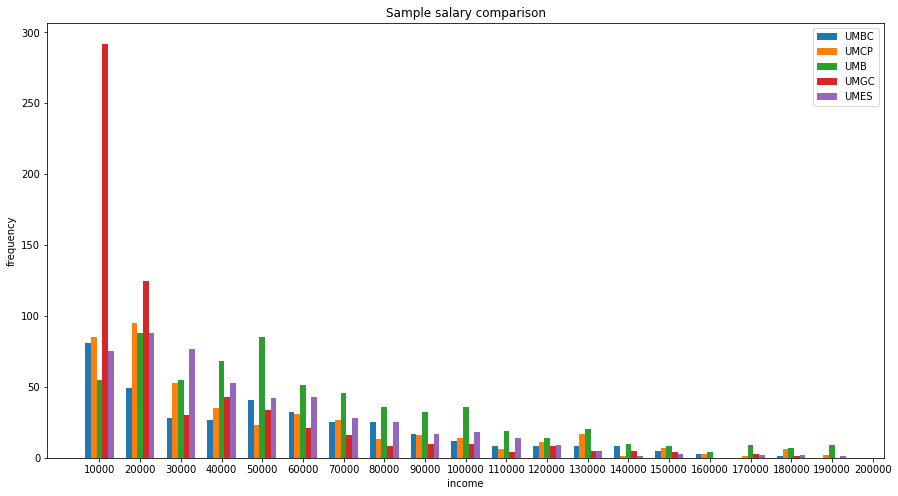

In [19]:
plt.figure(figsize=(15,8))
plt.title('Sample salary comparison')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist([UMBC_sample_salary['ytd_gross_earnings'], UMCP_sample_salary['ytd_gross_earnings'], 
            UMB_sample_salary['ytd_gross_earnings'], UMGC_sample_salary['ytd_gross_earnings'], 
            UMES_sample_salary['ytd_gross_earnings']], bins=interval, 
           label=['UMBC', 'UMCP', 'UMB', 'UMGC', 'UMES'], align='left', rwidth=0.7)
plt.xticks(interval)
plt.legend()
plt.show()

Text(0, 0.5, 'density')

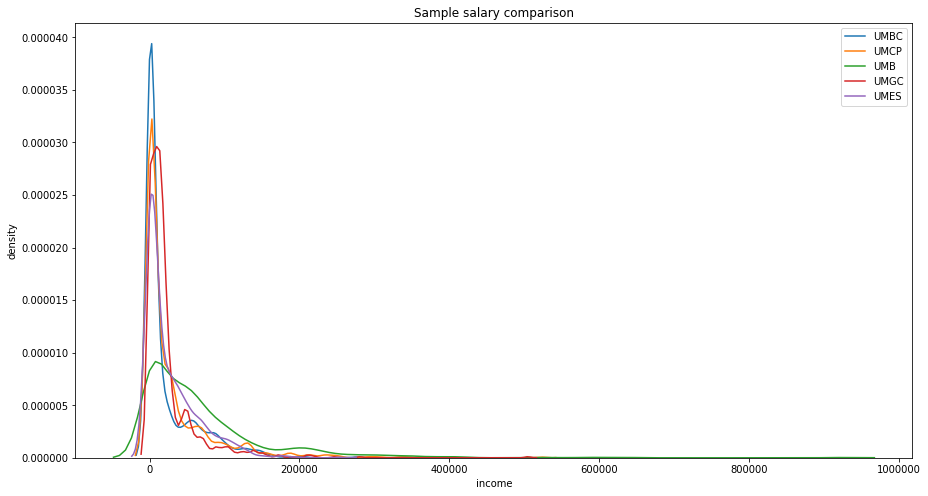

In [20]:

plt.figure(figsize=(15,8))
sns.distplot(UMBC_sample_salary['ytd_gross_earnings'], hist = False, label = 'UMBC')
sns.distplot(UMCP_sample_salary['ytd_gross_earnings'], hist = False, label = 'UMCP')
sns.distplot(UMB_sample_salary['ytd_gross_earnings'], hist = False, label = 'UMB')
sns.distplot(UMGC_sample_salary['ytd_gross_earnings'], hist = False,  label = 'UMGC')
sns.distplot(UMES_sample_salary['ytd_gross_earnings'], hist = False,  label = 'UMES')

plt.legend()
plt.title('Sample salary comparison')
plt.xlabel('income')
plt.ylabel('density')

{'whiskers': [<matplotlib.lines.Line2D at 0x148daf12d48>,
 'caps': [<matplotlib.lines.Line2D at 0x148db6ddf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x148daf26348>,
 'medians': [<matplotlib.lines.Line2D at 0x148dd9143c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x148db700648>,
 'means': []}

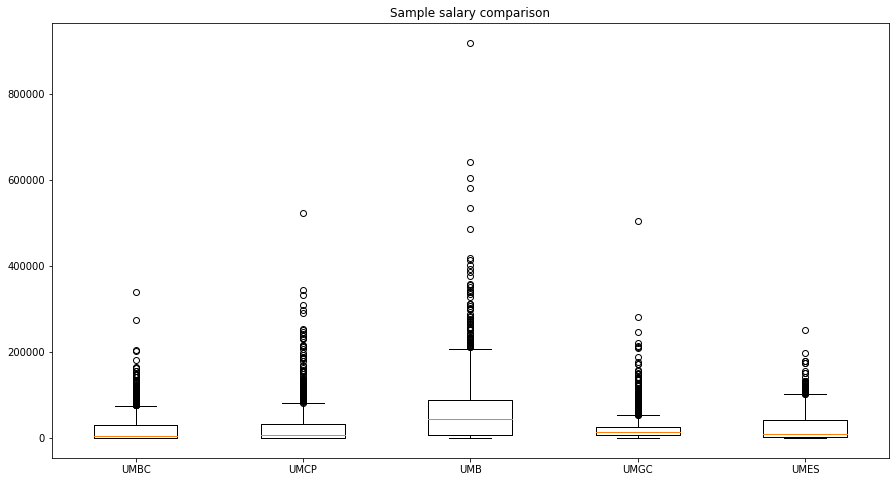

In [21]:
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Sample salary comparison')
ax1.boxplot([UMBC_sample_salary['ytd_gross_earnings'], UMCP_sample_salary['ytd_gross_earnings'], 
             UMB_sample_salary['ytd_gross_earnings'], UMGC_sample_salary['ytd_gross_earnings'], UMES_sample_salary['ytd_gross_earnings']], 
            labels=['UMBC', 'UMCP', 'UMB', 'UMGC', 'UMES'])

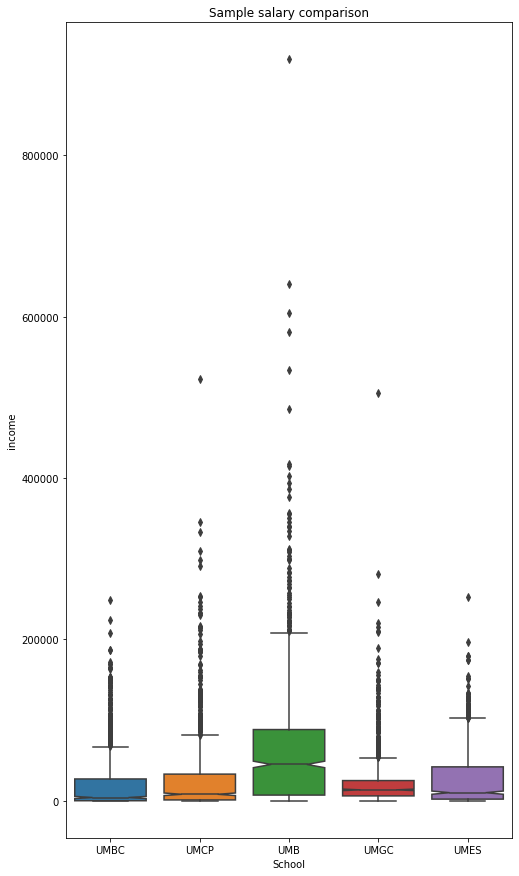

In [62]:
all_sample_salary=UMBC_sample_salary.append(UMCP_sample_salary).append(UMB_sample_salary).append(UMGC_sample_salary).append(UMES_sample_salary)
plt.figure(figsize=(8,15))
plt.title('Sample salary comparison')
ax = sns.boxplot(x="School", y="ytd_gross_earnings", data=all_sample_salary, notch=True)
ax.set(xlabel='School', ylabel='income')
plt.show()

## Test ANOVA assumptions

### Normal distribution
#### D’Agostino’s K^2 Test
#### Shapiro-Wilk Test

In [22]:
universities_salary=universities['ytd_gross_earnings']
stat, p = normaltest(universities_salary)
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Salary data looks Gaussian (fail to reject H0)')
else:
  print('Salary data does not look Gaussian (reject H0)')

stat, p = shapiro(universities_salary)
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Salary data looks Gaussian (fail to reject H0)')
else:
  print('Salary data does not look Gaussian (reject H0)')


Statistics=88841.714564, p=0.000000
Salary data does not look Gaussian (reject H0)
Statistics=0.586377, p=0.000000
Salary data does not look Gaussian (reject H0)


C:\SchoolWork\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
stat, p = normaltest(UMBC_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('UMBC sample looks Gaussian (fail to reject H0)')
else:
  print('UMBC sample does not look Gaussian (reject H0)')

stat, p = shapiro(UMBC_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('UMBC sample looks Gaussian (fail to reject H0)')
else:
  print('UMBC sample does not look Gaussian (reject H0)')

Statistics=549.272574, p=0.000000
UMBC sample does not look Gaussian (reject H0)
Statistics=0.657970, p=0.000000
UMBC sample does not look Gaussian (reject H0)


In [24]:
stat, p = normaltest(UMCP_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

stat, p = shapiro(UMCP_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=728.174126, p=0.000000
Sample does not look Gaussian (reject H0)
Statistics=0.621180, p=0.000000
Sample does not look Gaussian (reject H0)


In [25]:
stat, p = normaltest(UMB_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

stat, p = shapiro(UMB_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=714.663887, p=0.000000
Sample does not look Gaussian (reject H0)
Statistics=0.714405, p=0.000000
Sample does not look Gaussian (reject H0)


In [26]:
stat, p = normaltest(UMES_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

stat, p = shapiro(UMES_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=352.910201, p=0.000000
Sample does not look Gaussian (reject H0)
Statistics=0.775974, p=0.000000
Sample does not look Gaussian (reject H0)


### Homogeneity of variances

In [27]:
w, p = stats.bartlett(UMBC_sample_salary['ytd_gross_earnings'], UMCP_sample_salary['ytd_gross_earnings'], 
                      UMB_sample_salary['ytd_gross_earnings'], UMGC_sample_salary['ytd_gross_earnings'], 
                      UMES_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (w, p))
alpha = 0.05
if p > alpha:
  print('Samples from populations have equal variances (fail to reject H0)')
else:
  print('Samples from populations do not have equal variances (reject H0)')

Statistics=1310.672508, p=0.000000
Samples from populations do not have equal variances (reject H0)


## Analysis of Variance Test (ANOVA) 
### H0: salaries are all equal among the universities.
### Ha: at least one of the universities is different from others.

In [28]:
fvalue, pvalue = stats.f_oneway(UMBC_sample_salary['ytd_gross_earnings'], UMCP_sample_salary['ytd_gross_earnings'], 
                                UMB_sample_salary['ytd_gross_earnings'], UMGC_sample_salary['ytd_gross_earnings'], 
                                UMES_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

Statistics=121.188279, p=0.000000
Probably different distributions (reject H0)


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

## Tukey HSD test for multiple pairwise comparison (Post-hoc comparison) 
### H0: no statistical significant difference between two universities
### Ha: statistical significant difference between two universities

In [29]:
all_sample_salary=UMBC_sample_salary.append(UMCP_sample_salary).append(UMB_sample_salary).append(UMGC_sample_salary).append(UMES_sample_salary)

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(endog=all_sample_salary['ytd_gross_earnings'], groups=all_sample_salary['School'], alpha=0.05)
print(result)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -44045.0  0.001 -50540.6842 -37549.3158   True
   UMB   UMCP -37222.0  0.001 -43717.6842 -30726.3158   True
   UMB   UMES -39858.0  0.001 -46353.6842 -33362.3158   True
   UMB   UMGC -42889.0  0.001 -49384.6842 -36393.3158   True
  UMBC   UMCP   6823.0 0.0339    327.3158  13318.6842   True
  UMBC   UMES   4187.0 0.3994  -2308.6842  10682.6842  False
  UMBC   UMGC   1156.0    0.9  -5339.6842   7651.6842  False
  UMCP   UMES  -2636.0 0.7769  -9131.6842   3859.6842  False
  UMCP   UMGC  -5667.0  0.121 -12162.6842    828.6842  False
  UMES   UMGC  -3031.0 0.6827  -9526.6842   3464.6842  False
------------------------------------------------------------


Above results from Tukey HSD suggests that pairwise comparisons for UMB with all other universities reject null hypothesis and indicates statistical significant differences.

Result: The salary of UMB is higher than all other schools.

In [31]:
a = df.groupby(['School','pay_rate']).size()
display(a)
a_p = a / a.groupby(level=0).sum()
display(a_p)


School  pay_rate
UMB     A            7426
        H            2666
UMBC    A            3291
        H            5602
UMCP    A           18058
        H           19237
UMES    A            1003
        H             959
UMGC    A            1535
        H            5257
dtype: int64

School  pay_rate
UMB     A           0.735830
        H           0.264170
UMBC    A           0.370066
        H           0.629934
UMCP    A           0.484194
        H           0.515806
UMES    A           0.511213
        H           0.488787
UMGC    A           0.226001
        H           0.773999
dtype: float64

In [32]:
b = all_sample_salary.groupby(['School','pay_rate']).size()
display(b)
b_p = b / b.groupby(level=0).sum()
display(b_p)

School  pay_rate
UMB     A           744
        H           256
UMBC    A           379
        H           621
UMCP    A           494
        H           506
UMES    A           511
        H           489
UMGC    A           234
        H           766
dtype: int64

School  pay_rate
UMB     A           0.744
        H           0.256
UMBC    A           0.379
        H           0.621
UMCP    A           0.494
        H           0.506
UMES    A           0.511
        H           0.489
UMGC    A           0.234
        H           0.766
dtype: float64

UMB has the greatest counts of Anural pay rate records compared to all other schools.

In [33]:
print('UMBC termination count: ' + str(UMBC['term_date'].count()))
print('UMCP termination count: ' + str(UMCP['term_date'].count()))
print('UMB termination count: ' + str(UMB['term_date'].count()))
print('UMGC termination count: ' + str(UMGC['term_date'].count()))
print('UMES termination count: ' + str(UMES['term_date'].count()))

UMBC termination count: 2364
UMCP termination count: 10814
UMB termination count: 1590
UMGC termination count: 1244
UMES termination count: 604


In [34]:
print('UMBC sample termination count: ' + str(UMBC_sample_salary['term_date'].count()))
print('UMCP sample termination count: ' + str(UMCP_sample_salary['term_date'].count()))
print('UMB sample termination count: ' + str(UMB_sample_salary['term_date'].count()))
print('UMGC sample termination count: ' + str(UMGC_sample_salary['term_date'].count()))
print('UMES sample termination count: ' + str(UMES_sample_salary['term_date'].count()))

UMBC sample termination count: 253
UMCP sample termination count: 281
UMB sample termination count: 153
UMGC sample termination count: 178
UMES sample termination count: 301


UMB has the lowest counts of termination records compared to all other schools.

The reason could be the low termination rate and high number of annual pay rate type (full time) workers for UMB.
Other schools have higher termination rate and higher number of hourly pay rate type (part time) workers than UMB.

## Kruskal-Wallis H Test (non-parametric ANOVA Test)
### H0: salaries are all equal among the universities.
### Ha: at least one of the universities is different from others.

In [35]:
stat, p = kruskal(UMBC_sample_salary['ytd_gross_earnings'], UMCP_sample_salary['ytd_gross_earnings'], 
                  UMB_sample_salary['ytd_gross_earnings'], UMGC_sample_salary['ytd_gross_earnings'], 
                  UMES_sample_salary['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

Statistics=378.250140, p=0.000000
Probably different distributions (reject H0)


The P-value obtained from Kruskal-Wallis H test is significant (P<0.05), so we conclude that there are significant differences among salaries of universities.

## Conover's test for non-parametric multiple pairwise comparison (Post-hoc comparison)

In [36]:
import scikit_posthocs as sp
sp.posthoc_conover(all_sample_salary, val_col='ytd_gross_earnings', group_col='School', p_adjust = 'holm')

,UMB,UMBC,UMCP,UMES,UMGC
UMB,-1.000000e+00,3.789033e-77,7.507223e-50,1.385249e-35,9.292008e-35
UMBC,3.789033e-77,-1.000000e+00,4.136158e-04,1.327336e-09,5.430004e-10
UMCP,7.507223e-50,4.136158e-04,-1.000000e+00,2.903248e-02,2.721055e-02
UMES,1.385249e-35,1.327336e-09,2.903248e-02,-1.000000e+00,8.686863e-01
UMGC,9.292008e-35,5.430004e-10,2.721055e-02,8.686863e-01,-1.000000e+00


# Relationship between income and location for universities
## Chi-Squared Test

In [37]:
income_by_location=universities[['location','income_categories','ytd_gross_earnings']]
income_by_location['location'].value_counts()

Prince Georges County    44087
Baltimore City           10092
Baltimore County          8893
Somerset County           1962
Name: location, dtype: int64

In [38]:
income_by_location['income_categories'].value_counts()

0-10000         33297
10001-20000      6460
100000+          5605
20001-30000      5118
40001-50000      2742
30001-40000      2727
50001-60000      2720
60001-70000      2167
70001-80000      1692
80001-90000      1371
90001-100000     1135
Name: income_categories, dtype: int64

## The Null and Alternate Hypotheses

### H0:There is no statistically significant relationship between income and the location of university.
### Ha:There is a statistically significant relationship between income and  the location of university.

In [39]:
Prince_Georges_County  = income_by_location[income_by_location['location'].str.contains('Prince Georges County', na=False)]
sample_Prince_Georges_County = Prince_Georges_County.sample(n = 1000, replace = False) 

Baltimore_City = income_by_location[income_by_location['location'].str.contains('Baltimore City', na=False)]
sample_Baltimore_City = Baltimore_City.sample(n = 1000, replace = False) 

Baltimore_County  = income_by_location[income_by_location['location'].str.contains('Baltimore County', na=False)]
sample_Baltimore_County = Baltimore_County.sample(n = 1000, replace = False) 

Somerset_County  = income_by_location[income_by_location['location'].str.contains('Somerset County', na=False)]
sample_Somerset_County = Somerset_County.sample(n = 1000, replace = False) 

In [40]:
sample_income_by_location = sample_Prince_Georges_County.append(sample_Baltimore_City).append(sample_Baltimore_County).append(sample_Somerset_County)
sample_income_by_location

,location,income_categories,ytd_gross_earnings
120562,Prince Georges County,20001-30000,23000
118863,Prince Georges County,40001-50000,50000
88354,Prince Georges County,0-10000,0
113341,Prince Georges County,10001-20000,20000
134360,Prince Georges County,0-10000,0
...,...,...,...
114860,Somerset County,40001-50000,42000
114930,Somerset County,0-10000,4000
114827,Somerset County,50001-60000,57000
115906,Somerset County,100000+,132000


In [41]:
contingency_table = pd.crosstab(
    sample_income_by_location['location'],
    sample_income_by_location['income_categories'],
    margins = True
)
contingency_table

income_categories,0-10000,10001-20000,20001-30000,30001-40000,40001-50000,50001-60000,60001-70000,70001-80000,80001-90000,90001-100000,100000+,All
location,,,,,,,,,,,,
Baltimore City,267,63,76,47,70,90,67,42,35,37,206,1000
Baltimore County,631,82,66,30,37,26,23,21,15,16,53,1000
Prince Georges County,536,116,81,41,40,31,26,34,18,18,59,1000
Somerset County,506,87,68,69,69,39,40,32,24,15,51,1000
All,1940,348,291,187,216,186,156,129,92,86,369,4000


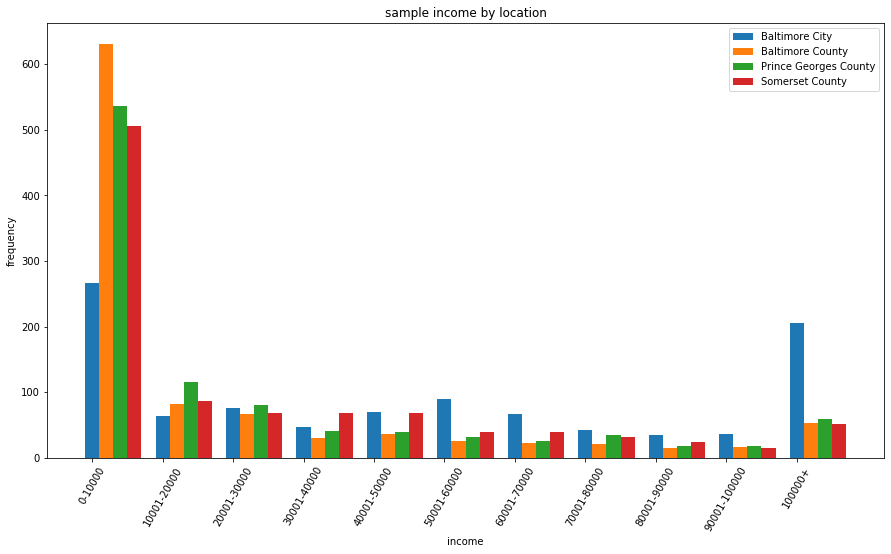

In [42]:
all_sample_income_by_location = []
all_sample_income_by_location.append(sample_Baltimore_City['income_categories'])
all_sample_income_by_location.append(sample_Baltimore_County['income_categories'])
all_sample_income_by_location.append(sample_Prince_Georges_County['income_categories'])
all_sample_income_by_location.append(sample_Somerset_County['income_categories'])
locations = ['Baltimore City','Baltimore County','Prince Georges County','Somerset County']

fig, ax = plt.subplots()
index = np.arange(len(label_names))
prop_iter = iter(plt.rcParams['axes.prop_cycle'])
fig.set_size_inches(15, 8)
bar_width = 0.2

for i in range(len(all_sample_income_by_location)):
    plt.bar(index+(bar_width*i), all_sample_income_by_location[i].value_counts(sort=False) , bar_width,color=next(prop_iter)['color'],
           label=locations[i])

plt.title('sample income by location')
plt.xlabel('income')
plt.ylabel('frequency')
plt.xticks(index, label_names, rotation=60)
plt.legend()
plt.show()
    

In [43]:
BaltimoreCityCount = contingency_table.iloc[0][0:11].values
BaltimoreCountyCount = contingency_table.iloc[1][0:11].values
PrinceGeorgesCountyCount = contingency_table.iloc[2][0:11].values
SomersetCountyCount = contingency_table.iloc[3][0:11].values

In [44]:
table = np.array([BaltimoreCityCount,BaltimoreCountyCount,PrinceGeorgesCountyCount,SomersetCountyCount])
table

array([[267,  63,  76,  47,  70,  90,  67,  42,  35,  37, 206],
       [631,  82,  66,  30,  37,  26,  23,  21,  15,  16,  53],
       [536, 116,  81,  41,  40,  31,  26,  34,  18,  18,  59],
       [506,  87,  68,  69,  69,  39,  40,  32,  24,  15,  51]],
      dtype=int64)

In [45]:
stat, p = stats.chi2_contingency(table)[0:2]
print('Statistics=%.6f, p=%.6f' % (stat, p))
alpha = 0.05
if p > alpha:
  print('There is no statistically significant relationship between income and the location of university. (fail to reject H0)')
else:
  print('There is a statistically significant relationship between income and the location of university. (reject H0)')

Statistics=508.773154, p=0.000000
There is a statistically significant relationship between income and the location of university. (reject H0)


## Analysis of Variance Test (ANOVA) 
### H0: salaries are all equal among the locations.
### Ha: at least one of the location is different from others.

In [46]:
fvalue, pvalue = stats.f_oneway(sample_Baltimore_City['ytd_gross_earnings'], sample_Baltimore_County['ytd_gross_earnings'], 
                                sample_Prince_Georges_County['ytd_gross_earnings'], sample_Somerset_County['ytd_gross_earnings'] )
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

Statistics=168.034044, p=0.000000
Probably different distributions (reject H0)


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among salaries of locations.

# Tukey HSD test for multiple pairwise comparison (Post-hoc comparison) 
### H0: no statistical significant difference between two locations
### Ha: statistical significant difference between two locations

In [47]:
result = pairwise_tukeyhsd(endog=sample_income_by_location['ytd_gross_earnings'], groups=sample_income_by_location['location'], alpha=0.05)
print(result)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
        group1                group2        meandiff p-adj     lower       upper    reject
------------------------------------------------------------------------------------------
       Baltimore City      Baltimore County -45204.0  0.001 -51076.8556 -39331.1444   True
       Baltimore City Prince Georges County -40196.0  0.001 -46068.8556 -34323.1444   True
       Baltimore City       Somerset County -39300.0  0.001 -45172.8556 -33427.1444   True
     Baltimore County Prince Georges County   5008.0 0.1255   -864.8556  10880.8556  False
     Baltimore County       Somerset County   5904.0 0.0482     31.1444  11776.8556   True
Prince Georges County       Somerset County    896.0    0.9  -4976.8556   6768.8556  False
------------------------------------------------------------------------------------------


Above results from Tukey HSD suggests that pairwise comparisons for Baltimore City with all other locations reject null hypothesis and indicates statistical significant differences.

Result: The salary of Baltimore City is higher than all other locations.

# Comparing Annual Pay Rate without termination salary for Schools

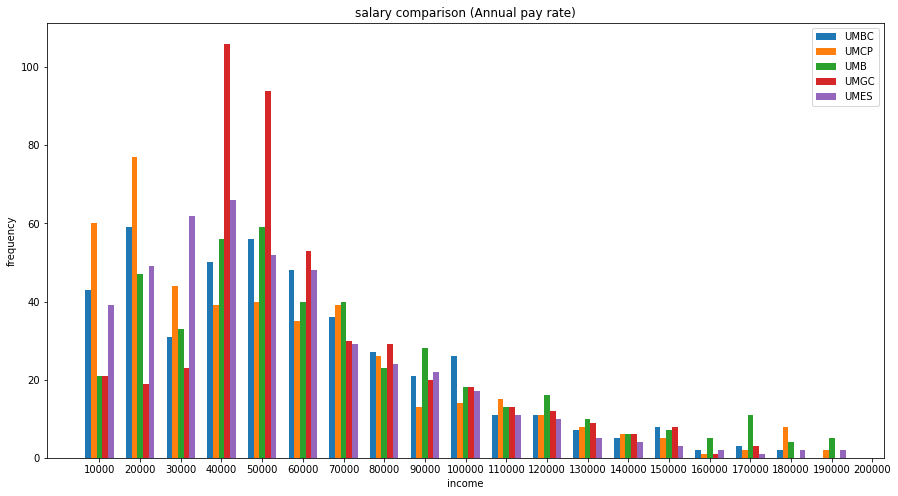

In [48]:
UMBC_A = UMBC[(UMBC['pay_rate']== 'A') & (UMBC['term_date'].isnull())]
UMCP_A = UMCP[(UMCP['pay_rate']== 'A') & (UMCP['term_date'].isnull())]
UMB_A = UMB[(UMB['pay_rate']== 'A') & (UMB['term_date'].isnull())]
UMGC_A = UMGC[(UMGC['pay_rate']== 'A') & (UMGC['term_date'].isnull())]
UMES_A = UMES[(UMES['pay_rate']== 'A') & (UMES['term_date'].isnull())]

UMBC_A_sample = UMBC_A.sample(n = 500, replace = False) 
UMCP_A_sample = UMCP_A.sample(n = 500, replace = False) 
UMB_A_sample = UMB_A.sample(n = 500, replace = False) 
UMGC_A_sample = UMGC_A.sample(n = 500, replace = False) 
UMES_A_sample = UMES_A.sample(n = 500, replace = False) 

plt.figure(figsize=(15,8))
plt.title('salary comparison (Annual pay rate)')
plt.xlabel('income')
plt.ylabel('frequency')
_=plt.hist([UMBC_A_sample['ytd_gross_earnings'], UMCP_A_sample['ytd_gross_earnings'], 
            UMB_A_sample['ytd_gross_earnings'], UMGC_A_sample['ytd_gross_earnings'], 
            UMES_A_sample['ytd_gross_earnings']], bins=interval, 
           label=['UMBC', 'UMCP', 'UMB', 'UMGC', 'UMES'], align='left', rwidth=0.7)
plt.xticks(interval)
plt.legend()
plt.show()

In [49]:
print('UMBC sample salary mean: ' + str(UMBC_A_sample['ytd_gross_earnings'].mean()))
print('UMCP sample salary mean: ' + str(UMCP_A_sample['ytd_gross_earnings'].mean()))
print('UMB sample salary mean: ' + str(UMB_A_sample['ytd_gross_earnings'].mean()))
print('UMGC sample salary mean: ' + str(UMGC_A_sample['ytd_gross_earnings'].mean()))
print('UMES sample salary mean: ' + str(UMES_A_sample['ytd_gross_earnings'].mean()))

UMBC sample salary mean: 61260.0
UMCP sample salary mean: 56886.0
UMB sample salary mean: 90588.0
UMGC sample salary mean: 65976.0
UMES sample salary mean: 54014.0


In [50]:
UMB_UMBC=(UMB_A_sample['ytd_gross_earnings'].mean()-UMBC_A_sample['ytd_gross_earnings'].mean())/((UMB_A_sample['ytd_gross_earnings'].mean() + UMBC_A_sample['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMCP=(UMB_A_sample['ytd_gross_earnings'].mean()-UMCP_A_sample['ytd_gross_earnings'].mean())/((UMB_A_sample['ytd_gross_earnings'].mean() + UMCP_A_sample['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMES=(UMB_A_sample['ytd_gross_earnings'].mean()-UMES_A_sample['ytd_gross_earnings'].mean())/((UMB_A_sample['ytd_gross_earnings'].mean() + UMES_A_sample['ytd_gross_earnings'].mean()) / 2)*100
UMB_UMGC=(UMB_A_sample['ytd_gross_earnings'].mean()-UMGC_A_sample['ytd_gross_earnings'].mean())/((UMB_A_sample['ytd_gross_earnings'].mean() + UMGC_A_sample['ytd_gross_earnings'].mean()) / 2)*100

print('The percentage difference between UMB and UMBC is ',UMB_UMBC)
print('The percentage difference between UMB and UMCP is ',UMB_UMCP)
print('The percentage difference between UMB and UMES is ',UMB_UMES)
print('The percentage difference between UMB and UMGC is ',UMB_UMGC)

The percentage difference between UMB and UMBC is  38.62810178599652
The percentage difference between UMB and UMCP is  45.70568371373937
The percentage difference between UMB and UMES is  50.58574570199582
The percentage difference between UMB and UMGC is  31.44017781865563


In [51]:
print('UMBC sample salary median: ' + str(UMBC_A_sample['ytd_gross_earnings'].median()))
print('UMCP sample salary median: ' + str(UMCP_A_sample['ytd_gross_earnings'].median()))
print('UMB sample salary median: ' + str(UMB_A_sample['ytd_gross_earnings'].median()))
print('UMGC sample salary median: ' + str(UMGC_A_sample['ytd_gross_earnings'].median()))
print('UMES sample salary median: ' + str(UMES_A_sample['ytd_gross_earnings'].median()))

UMBC sample salary median: 55000.0
UMCP sample salary median: 44500.0
UMB sample salary median: 65000.0
UMGC sample salary median: 55000.0
UMES sample salary median: 48000.0


In [52]:
fvalue, pvalue = stats.f_oneway(UMBC_A_sample['ytd_gross_earnings'], UMCP_A_sample['ytd_gross_earnings'], 
                                UMB_A_sample['ytd_gross_earnings'], UMGC_A_sample['ytd_gross_earnings'],
                               UMES_A_sample['ytd_gross_earnings'])
print('Statistics=%.6f, p=%.6f' % (fvalue, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Probably the same distribution (fail to reject H0)')
else:
    print('Probably different distributions (reject H0)')

Statistics=37.344314, p=0.000000
Probably different distributions (reject H0)


The P-value obtained from ANOVA test is significant (P<0.05), so we conclude that there are significant differences among annual pay rate salaries of universities.

In [53]:
All_A_sample=UMBC_A_sample.append(UMCP_A_sample).append(UMB_A_sample).append(UMGC_A_sample).append(UMES_A_sample)
result = pairwise_tukeyhsd(endog=All_A_sample['ytd_gross_earnings'], groups=All_A_sample['School'], alpha=0.05)
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2 meandiff p-adj     lower       upper    reject
------------------------------------------------------------
   UMB   UMBC -29328.0  0.001 -38555.4913 -20100.5087   True
   UMB   UMCP -33702.0  0.001 -42929.4913 -24474.5087   True
   UMB   UMES -36574.0  0.001 -45801.4913 -27346.5087   True
   UMB   UMGC -24612.0  0.001 -33839.4913 -15384.5087   True
  UMBC   UMCP  -4374.0  0.671 -13601.4913   4853.4913  False
  UMBC   UMES  -7246.0  0.202 -16473.4913   1981.4913  False
  UMBC   UMGC   4716.0 0.6136  -4511.4913  13943.4913  False
  UMCP   UMES  -2872.0    0.9 -12099.4913   6355.4913  False
  UMCP   UMGC   9090.0 0.0559   -137.4913  18317.4913  False
  UMES   UMGC  11962.0 0.0038   2734.5087  21189.4913   True
------------------------------------------------------------


However, comparing to the result of all salary comparison. The annual pay rate salary without termination comparison shows different results.

Above results from Tukey HSD suggests that pairwise comparisons for UMB with all other universities reject null hypothesis and indicates statistical significant differences.

Besides, UMBC vs UMGC, UMCP vs UMES, UMES vs UMGC are also rejecting the null hypothesis and indicating statistically significant differences.

Result: The salary of UMB is higher than all other schools even for annual pay rate salary without termination records.
     